In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

import os

from itertools import islice

In [3]:
from helpers import (load_whole_games, get_game_summaries, get_game_lengths, 
                     load_one_game, plot_game_history, plot_wins_vs_losses,
                     starting_cards_heatmap)

In [4]:
whole_games = load_whole_games(1000)

In [5]:
whole_games.head()

,num_a,num_b,num_aces_a,num_aces_b,num_kings_a,num_kings_b,wars,game
0,26,26,2,2,1,3,0,0
1,27,25,2,2,1,3,0,0
2,28,24,2,2,1,3,1,0
3,32,20,2,2,2,2,0,0
4,31,21,2,2,2,2,0,0


In [6]:
whole_games.shape

(312330, 8)

In [7]:
results = get_game_summaries()

In [8]:
len(results)

100000

In [9]:
results['a_won'].value_counts()

False    50168
True     49832
Name: a_won, dtype: int64

In [10]:
games_and_results = whole_games.merge(results, on='game')

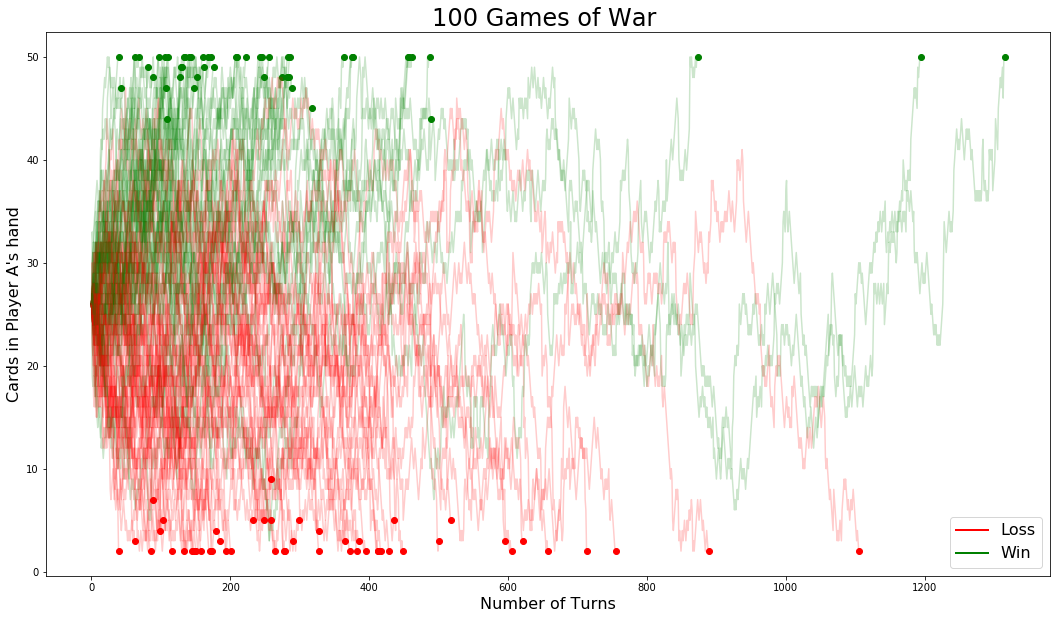

In [11]:
plot_wins_vs_losses(games_and_results, 100, .2);

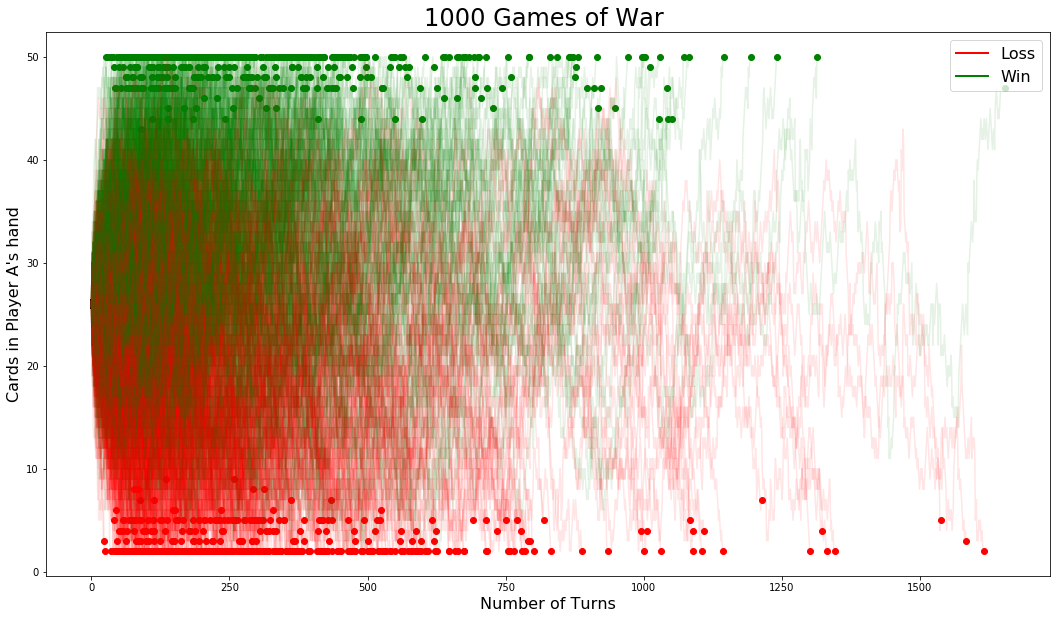

In [13]:
plot_wins_vs_losses(games_and_results, 1000, .1);

In [14]:
results['a_won_first_round'].value_counts()

False    50549
True     49451
Name: a_won_first_round, dtype: int64

In [15]:
lengths = get_game_lengths()

In [16]:
lengths['turns'].describe()

count    100000.000000
mean        320.643210
std         264.450079
min          13.000000
25%         136.000000
50%         241.000000
75%         423.000000
max        3614.000000
Name: turns, dtype: float64

In [17]:
len(lengths[lengths['turns'] <= 900]) / len(lengths)

0.95952

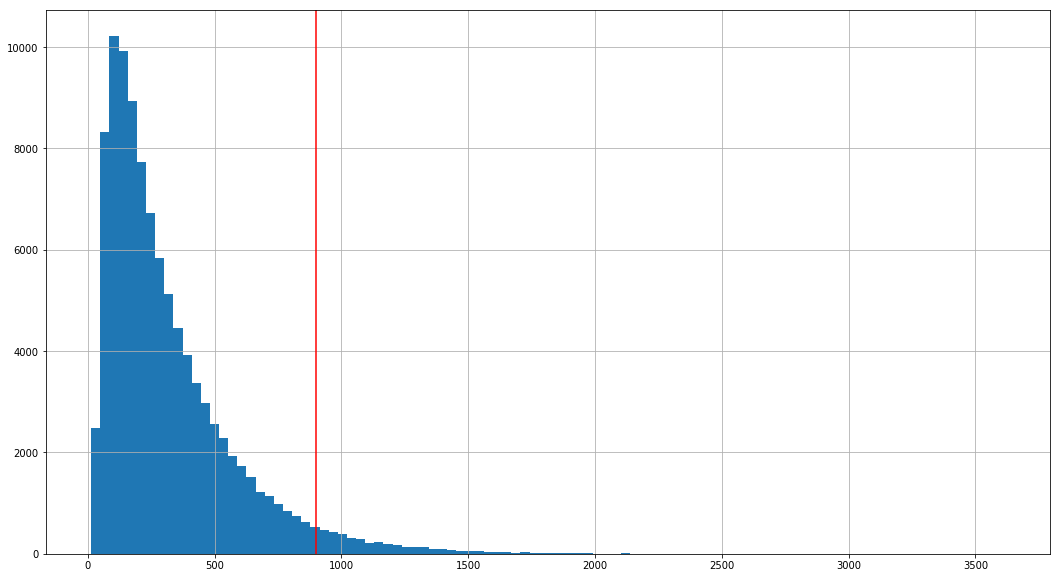

In [193]:
lengths['turns'].hist(bins=100, figsize=(18, 10)).axvline(15*60, color='r');

In [14]:
results.groupby('a_won_first_round')['a_won'].mean()

a_won_first_round
False    0.388752
True     0.610321
Name: a_won, dtype: float64

In [15]:
results.groupby(['a_won', 'a_won_first_round']).size().unstack()

a_won_first_round,False,True
a_won,,
False,30898,19270
True,19651,30181


In [184]:
whole_games = load_whole_games()
temp = whole_games.merge(results, on='game')
four_ace_game = temp[(temp['a_starting_aces'] == 4)]

In [185]:
four_ace_game['game'].nunique()

5570

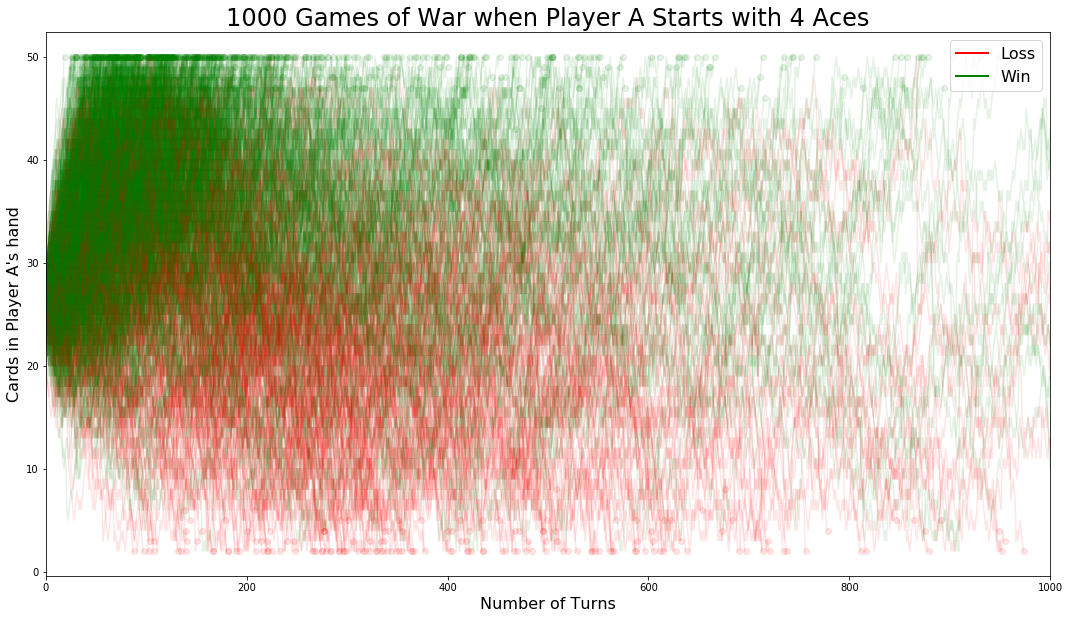

In [186]:
wins_vs_losses(four_ace_game, 1000, linealpha=.1,
               markeralpha=.1, xlim=[0, 1000],
               additional_title='when Player A Starts with 4 Aces');

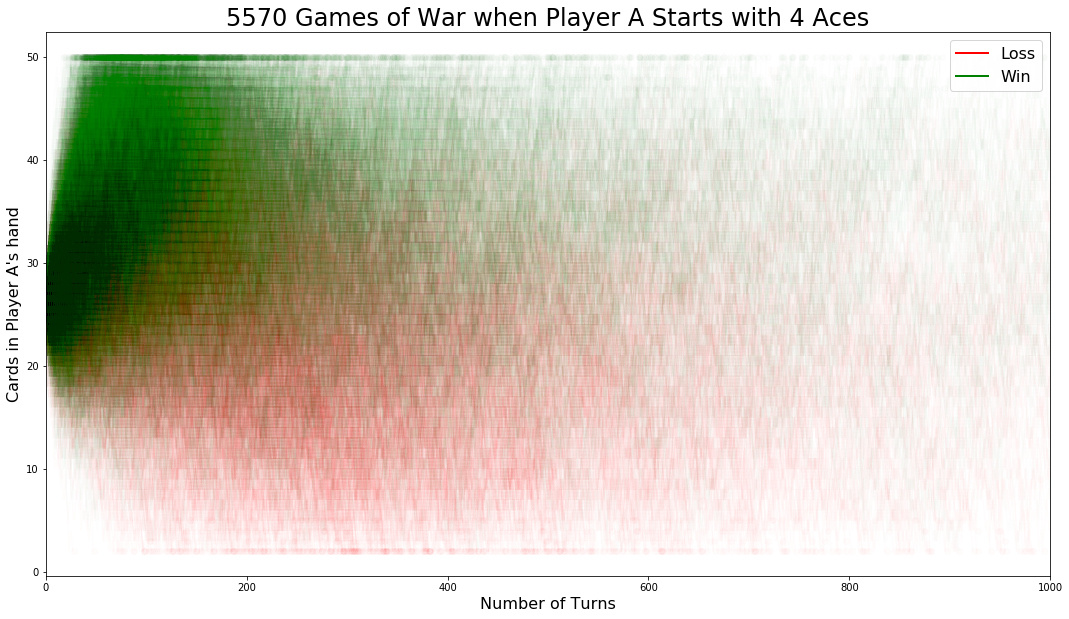

In [187]:
wins_vs_losses(four_ace_game, 5570, linealpha=.01,
               markeralpha=.01, xlim=[0, 1000],
               additional_title='when Player A Starts with 4 Aces');

In [188]:
len(results)

100000

In [189]:
results.groupby('a_starting_aces').size()

a_starting_aces
0     5580
1    25127
2    38944
3    24779
4     5570
dtype: int64

In [190]:
results.groupby('a_starting_aces')['a_won'].mean()

a_starting_aces
0    0.174014
1    0.333705
2    0.497098
3    0.665402
4    0.831059
Name: a_won, dtype: float64

In [ ]:
actual_whole_games = load_whole_games()
temp = actual_whole_games.merge(lengths, on='game')

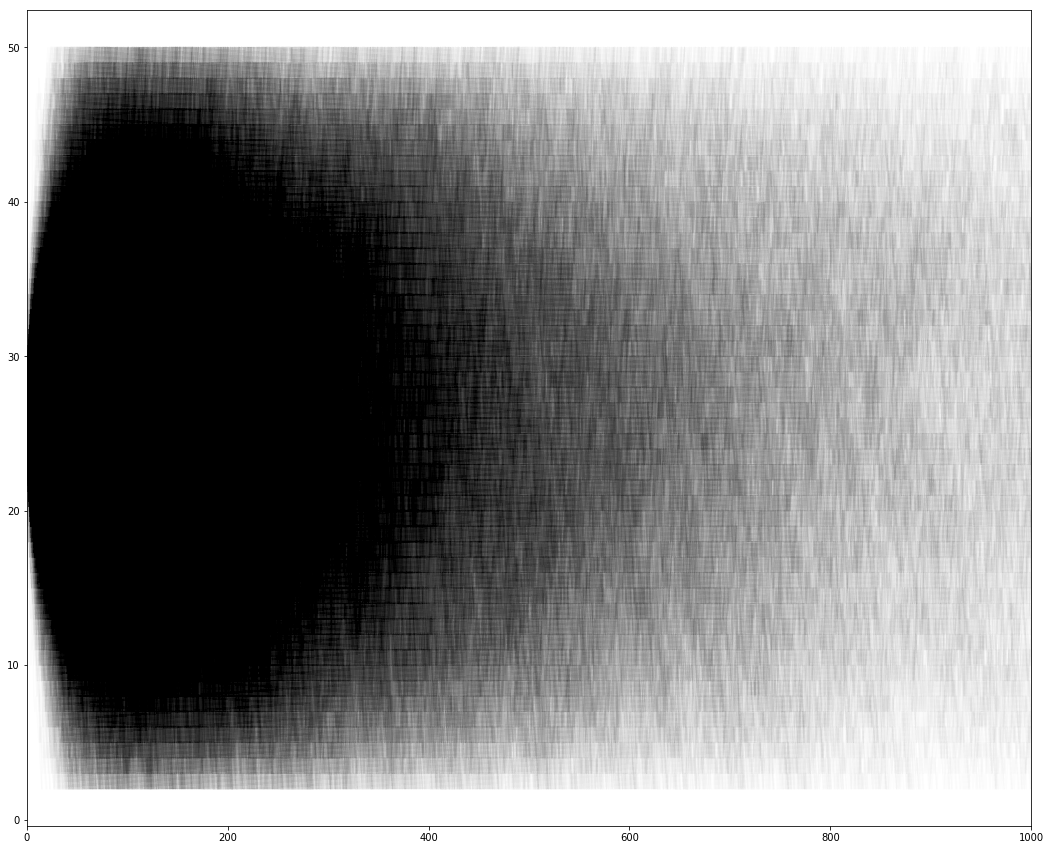

In [67]:
fig, ax = plt.subplots(figsize=(18, 15))

gb = temp.groupby('game')
for name, group in itertools.islice(gb, 10000):

    num_turns = len(group)
    last_turn = group.tail(1)
    len_bracket = group['length_bracket'].iloc[0]
    
    ax.plot(range(num_turns), group['num_a'], color='k', alpha=0.01)
    ax.set_xlim([0, 1000])

In [55]:
gb = results.groupby(['a_starting_aces', 'a_starting_kings'])['a_won']

In [61]:
counts_by_starts = gb.count().unstack()
counts_by_starts

a_starting_kings,0,1,2,3,4
a_starting_aces,,,,,
0,219,1121,2182,1668,390
1,1110,5755,9706,6899,1657
2,2109,9750,15459,9538,2088
3,1600,6778,9569,5696,1136
4,432,1668,2136,1130,204


In [60]:
wins_by_starts = gb.mean().unstack()
wins_by_starts

a_starting_kings,0,1,2,3,4
a_starting_aces,,,,,
0,0.054795,0.116860,0.169111,0.214628,0.258974
1,0.232432,0.276803,0.334432,0.377011,0.414605
2,0.382646,0.453333,0.498350,0.544873,0.589559
3,0.576875,0.626438,0.670185,0.712605,0.745599
4,0.782407,0.793765,0.843165,0.866372,0.916667


In [91]:
def starting_cards_heatmap(df):
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(df.values)
    fig.colorbar(cax);
    ax.set_xlabel('Starting Kings', fontsize=24)
    ax.set_ylabel('Starting Aces', fontsize=24);
    plt.tight_layout()
    return ax

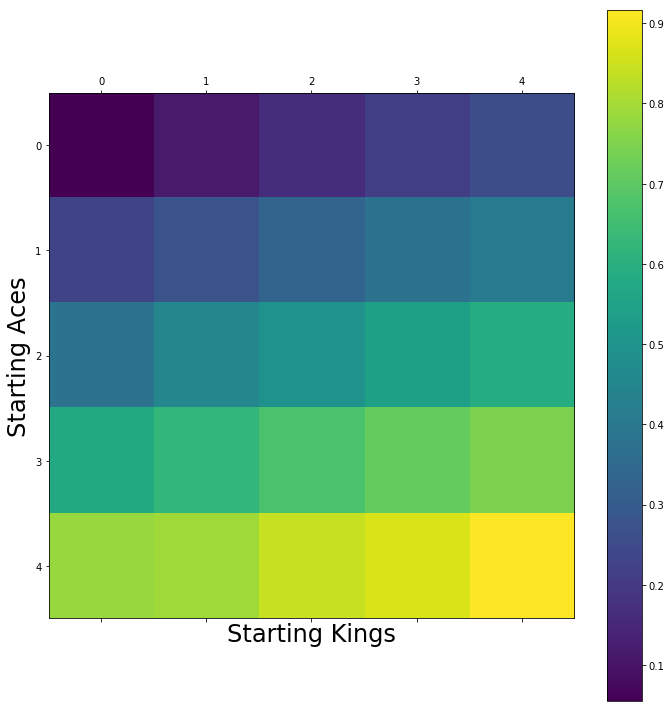

In [96]:
starting_cards_heatmap(wins_by_starts);

In [42]:
interesting_wins = results[(results['a_starting_aces'] == 0)
                           & (results['a_starting_kings'] == 0)
                           & (results['a_won'] == True)]
interesting_wins

,game,a_starting_aces,a_starting_kings,a_won,a_won_first_round
7289,16558,0,0,True,False
21014,28910,0,0,True,False
22282,30050,0,0,True,False
32896,39604,0,0,True,False
46834,52148,0,0,True,False
48700,53828,0,0,True,False
53270,57941,0,0,True,False
59993,63992,0,0,True,False
67711,70938,0,0,True,False
69862,72874,0,0,True,False


In [43]:
interesting_losses = results[(results['a_starting_aces'] == 4) & (results['a_starting_kings'] == 4)
                             & (results['a_won'] == False)]
interesting_losses.merge(lengths)

,game,a_starting_aces,a_starting_kings,a_won,a_won_first_round,turns
0,15207,4,4,False,True,689
1,26007,4,4,False,False,243
2,28449,4,4,False,True,732
3,31479,4,4,False,True,949
4,33303,4,4,False,True,478
5,33521,4,4,False,True,394
6,34701,4,4,False,True,310
7,40859,4,4,False,True,403
8,41398,4,4,False,True,733
9,44944,4,4,False,True,487


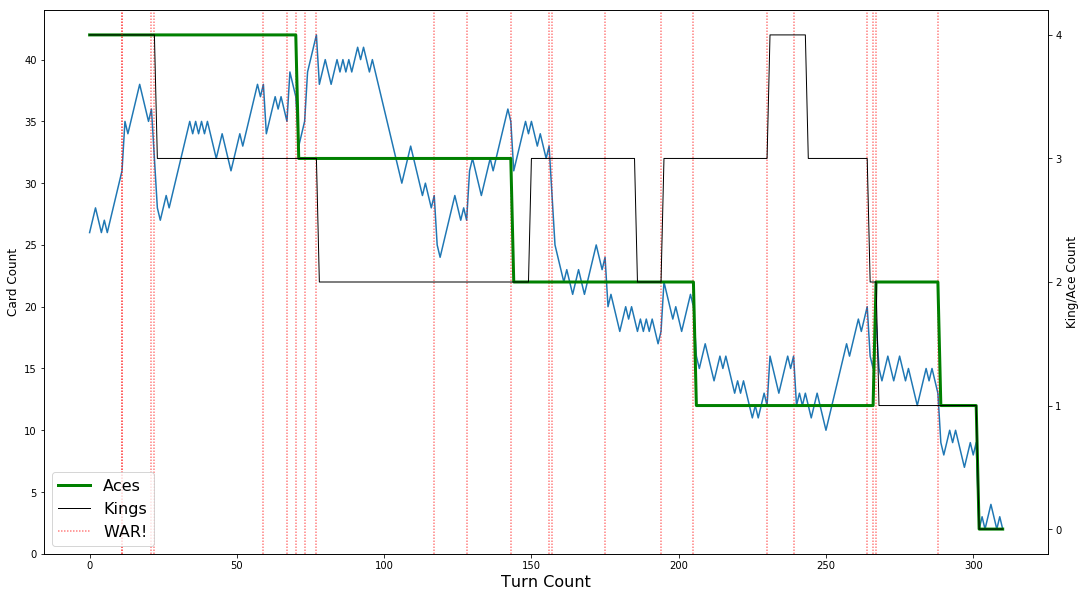

In [44]:
ax = plot_game_history(34701)

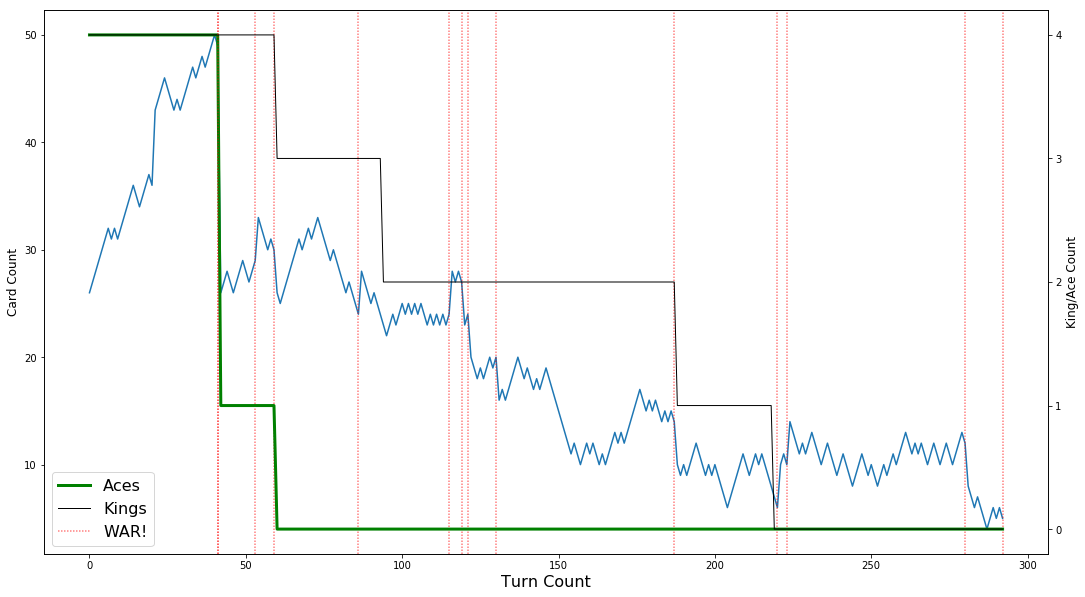

In [47]:
ax = plot_game_history(980)